<a href="https://colab.research.google.com/github/nuibb/Data-Science-Samples-Python/blob/master/Tensorflow_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf 
import numpy as np 
import math
import matplotlib.pyplot as plt 
import matplotlib.animation as anim 

Generate some house sizes between 1000 and 3500 square feet

In [6]:
num_house = 100
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house)
print(house_size)

[1860 2294 2130 2095 2638 3169 1466 2238 1330 2482 3135 1130 2685 1769
 3391 2515 3433 2215 1955 3324 2184 1459 1021 3300 1747 1474 2082 3047
 1975 2806 1189 1562 2899 2267 2528 1646 3068 3214 2297 3435 1600 3363
 3061 1241 3041 2363 3139 2390 2478 1775 1034 3253 2955 2585 2021 2129
 2500 1702 3449 2579 1161 1201 2981 1995 3317 1815 1455 2275 2016 3343
 1337 1878 2076 1791 3264 1763 3235 1379 1492 2180 3062 1064 2367 2152
 3027 2495 2162 2522 1391 2698 1418 3336 1378 2796 3278 3088 3182 1200
 2863 1779]


Generate house prices from house size with a random noise added.

In [7]:
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_house)
print(house_price)

[221795. 250260. 271158. 274232. 295084. 343165. 183450. 280994. 174962.
 315391. 377631. 149023. 329590. 198585. 359869. 273933. 368611. 279319.
 254688. 369968. 258169. 194593. 128496. 377480. 236134. 193058. 247142.
 343131. 220247. 300789. 158018. 211973. 311799. 247967. 304351. 195994.
 330356. 345290. 291306. 394240. 194502. 378077. 336727. 152892. 367423.
 299321. 342333. 302001. 278816. 221397. 126012. 368783. 364055. 295659.
 267074. 273894. 284541. 226120. 391431. 279485. 140043. 164039. 337557.
 220521. 363353. 245073. 178917. 288257. 231292. 400058. 160573. 213475.
 227761. 236165. 372957. 230063. 376106. 169434. 198327. 278397. 352051.
 127416. 280953. 259476. 345947. 293800. 244729. 289462. 168368. 311071.
 173985. 374843. 196899. 308171. 387776. 366844. 387416. 188984. 347074.
 200468.]


Showing with graph

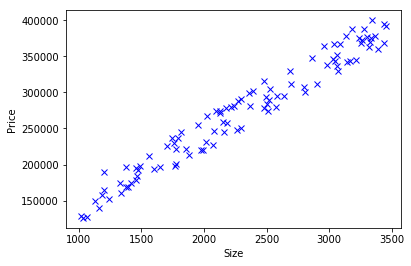

In [8]:
plt.plot(house_size, house_price, "bx") # bx for blue x
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

Now you need to normalize values to prevent under/overflow, house price and size should be on same scale

In [0]:
def normalize(array):
  return (array - array.mean())/array.std()

Define number of training samples, 0.7 = 70%. We can take the first 70% since the values are randomized

In [13]:
num_train_samples = math.floor(num_house * 0.7)
print(num_train_samples)

70


Define training data

In [0]:
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asarray(house_price[:num_train_samples])

Normalize data

In [16]:
train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)
print(train_house_size_norm)
print(train_price_norm)

[-0.65014963 -0.04186699 -0.27172494 -0.32078     0.4402741   1.18450932
 -1.20236936 -0.12035507 -1.39298328  0.22162872  1.13685584 -1.67329786
  0.50614803 -0.77769277  1.49565851  0.26788063  1.55452457 -0.15259125
 -0.5170002   1.40175312 -0.19604001 -1.21218037 -1.82606931  1.36811537
 -0.80852737 -1.19115678 -0.33900044  1.01351742 -0.48896875  0.67573835
 -1.59060506 -1.06781836  0.80608463 -0.07970945  0.28610108 -0.95008624
  1.04295045  1.2475801  -0.03766227  1.55732771 -1.01455859  1.45641446
  1.03313944 -1.51772327  1.00510798  0.05484155  1.14246213  0.09268401
  0.21602243 -0.76928333 -1.80784886  1.30224144  0.88457271  0.36599073
 -0.42449639 -0.27312652  0.24685704 -0.87159815  1.57694973  0.3575813
 -1.6298491  -1.57378618  0.92101361 -0.46093729  1.39194211 -0.71322041
 -1.21778666 -0.06849687 -0.43150426  1.42838301]
[-7.12544031e-01 -3.24227603e-01 -3.91393648e-02  2.79580812e-03
  2.87256519e-01  9.43172281e-01 -1.23564234e+00  9.50422751e-02
 -1.35143471e+00  